In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
placement_df= pd.read_csv('Campus_Selection.csv')
placement_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [4]:
placement_df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [5]:
placement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [6]:
placement_df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [7]:
placement_df['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [8]:
placement_df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [9]:
placement_df['gender'].unique()

array(['M', 'F'], dtype=object)

In [10]:
placement_df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [11]:
placement_df['degree_t'].unique()


array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [12]:
placement_df['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
# No missing values
# Unwanted column sl_no
placement_df_required= placement_df.drop('sl_no',axis = 1)
placement_df_required

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


<Axes: >

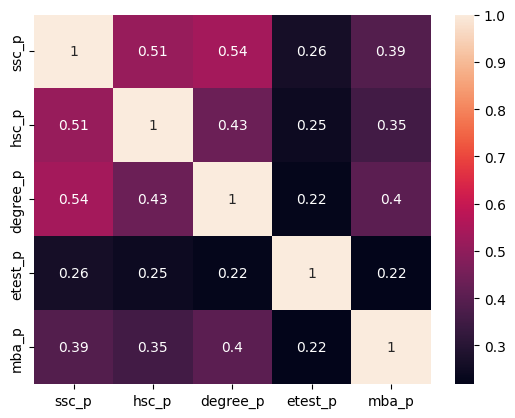

In [18]:
sns.heatmap(placement_df_required.select_dtypes(exclude=[object]).corr(),annot = True) # this method excludes the object dtypes

<Axes: xlabel='degree_p', ylabel='status'>

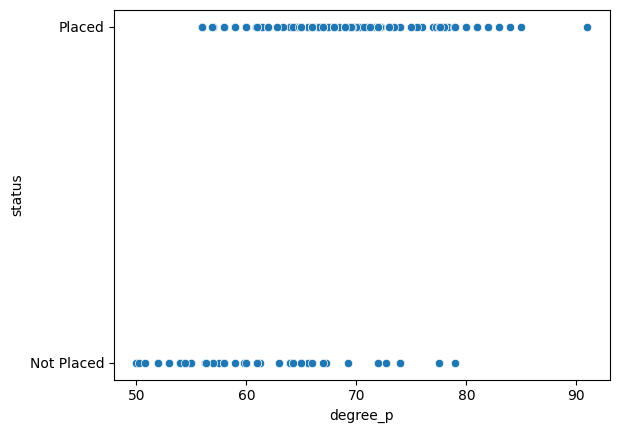

In [19]:
sns.scatterplot(x=placement_df_required['degree_p'],y = placement_df_required['status'])


<Axes: xlabel='hsc_b', ylabel='hsc_p'>

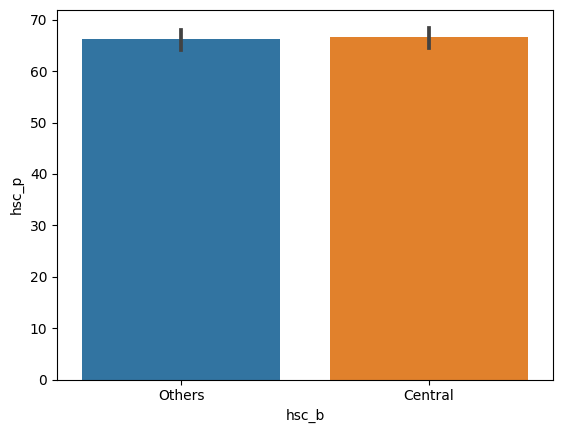

In [20]:
sns.barplot(x = placement_df_required['hsc_b'],y = placement_df_required['hsc_p'])

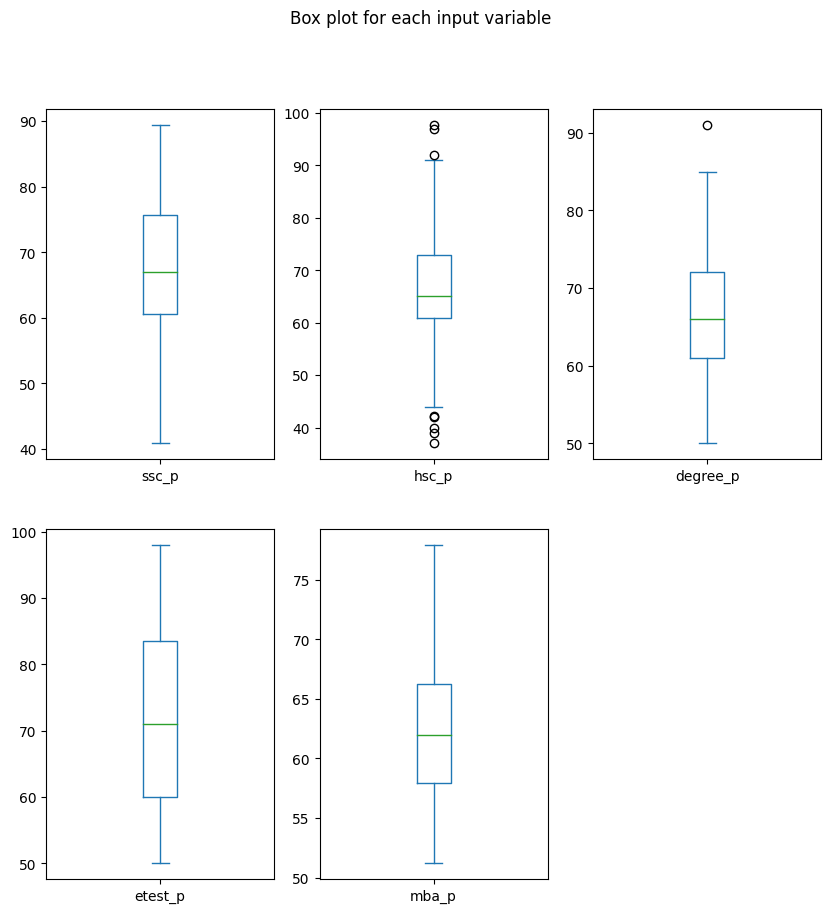

In [21]:
placement_df_required.plot(kind= 'box',subplots = True,layout = (2,3),sharex = False,sharey=False,figsize = (10,10),title = 'Box plot for each input variable')
plt.savefig('placement_boxplot')
plt.show()

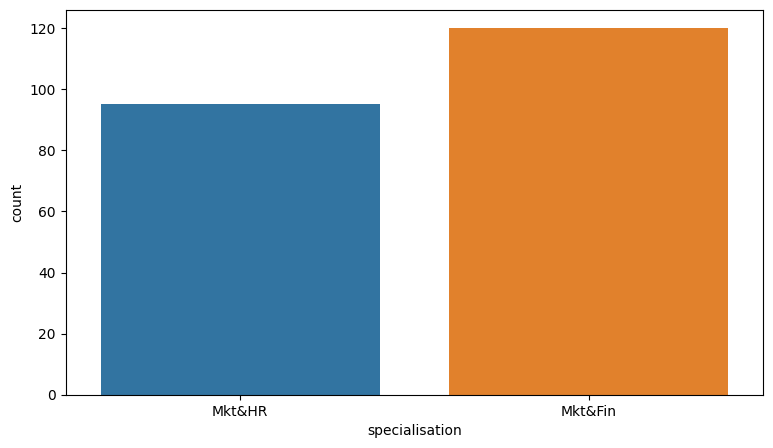

In [23]:
# specialisation distribution
plt.figure(figsize = (9,5))
sns.countplot(x = placement_df_required.specialisation)
plt.show()

<Figure size 900x500 with 0 Axes>

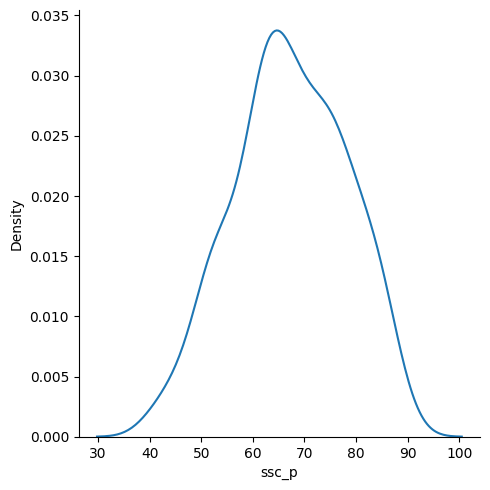

In [24]:
plt.figure(figsize = (9,5))
sns.displot(placement_df_required.ssc_p,kind ='kde')
plt.show()

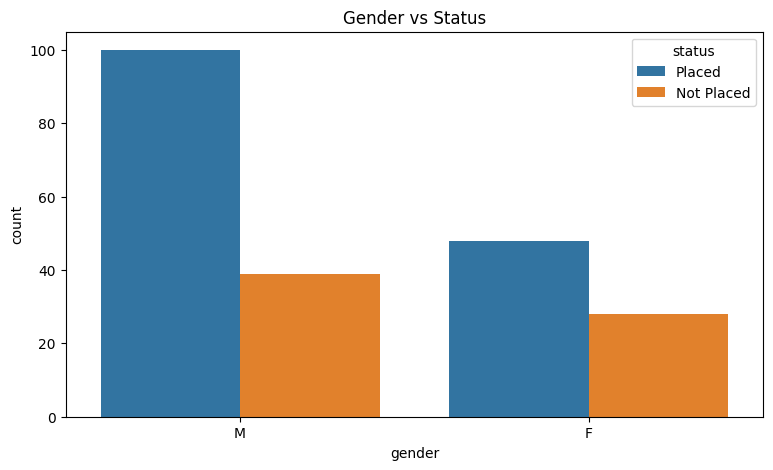

In [28]:
plt.figure(figsize = (9,5))
sns.countplot(x = 'gender',hue='status',data = placement_df_required)
plt.title('Gender vs Status')
plt.show()

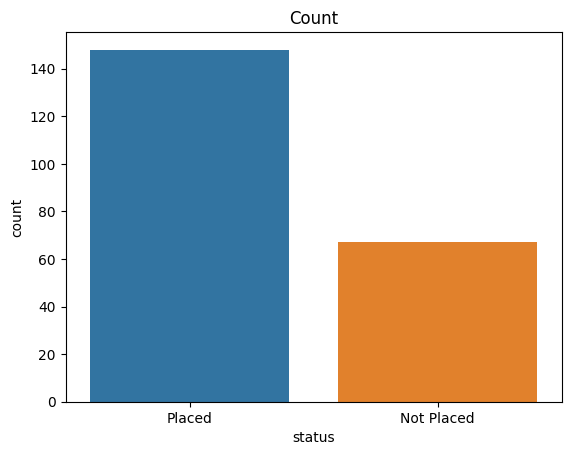

In [34]:
sns.countplot(x = placement_df_required['status'],label = 'Count')
plt.show()

In [35]:
# dataset is not a balanced one,which needs to be addressed
# Need to do encoding of categorial fields